<a href="https://colab.research.google.com/github/anxosanchez/cheel/blob/main/Diagrama_Pxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np

In [17]:
from chemicals.critical import critical_data_Yaws

In [4]:
 from chemicals import CAS_from_any, MW, Tb, Tm, Tc, Pc, Vc, Hfus, Hfs, Hfl, Hfg, S0s, S0l, S0g

In [5]:
CAS_nhexano = CAS_from_any('n-hexane')

In [6]:
CAS_noctano = CAS_from_any('n-octane')

In [7]:
from chemicals import Antoine

In [8]:
from chemicals.vapor_pressure import Psat_data_AntoinePoling

In [9]:
antoine_coefficients_hexano = Psat_data_AntoinePoling.loc[CAS_nhexano]

In [10]:
antoine_coefficients_octano = Psat_data_AntoinePoling.loc[CAS_noctano]

In [12]:
antoine_coefficients_octano

Chemical    octane 
A           9.05075
B           1356.36
C           -63.515
Tmin         299.42
Tmax         425.23
Name: 111-65-9, dtype: object

In [13]:
antoine_coefficients_hexano

Chemical     hexane 
A            9.00139
B           1170.875
C            -48.833
Tmin          254.24
Tmax          365.25
Name: 110-54-3, dtype: object

In [18]:
x1=np.linspace(0,1,num=11)

In [19]:
x1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [21]:
x2 = 1 - x1

In [22]:
x2

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [23]:
A1=antoine_coefficients_hexano.A

In [24]:
B1=antoine_coefficients_hexano.B

In [25]:
C1=antoine_coefficients_hexano.C

In [26]:
A2=antoine_coefficients_octano.A

In [27]:
B2=antoine_coefficients_octano.B

In [28]:
C2=antoine_coefficients_octano.C

In [30]:
P1sat=10**(A1-B1/(388+C1))*10**(-5)
P1sat

3.54145795908193

In [32]:
P2sat=10**(A2-B2/(388+C2))*10**(-5)
P2sat

0.7425246248925617

In [34]:
Pburb = x1 * P1sat + ( 1 -x1 ) * P2sat
Pburb

array([0.74252462, 1.02241796, 1.30231129, 1.58220463, 1.86209796,
       2.14199129, 2.42188463, 2.70177796, 2.98167129, 3.26156463,
       3.54145796])

In [36]:
import matplotlib.pyplot as plt

In [ ]:
y1=P1sat*x1/Pburbuja

In [ ]:
y2=P2sat*x2/Pburbuja

Text(0.5, 1.0, 'P-xy')

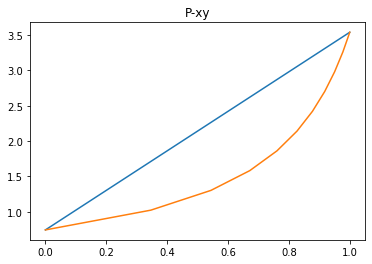

In [ ]:
plt.plot(x1,Pburbuja,y1,Pburbuja,)
plt.title("P-xy")

In [ ]:
import math 

In [ ]:
T1=B1/(A1-math.log10(1.5*10**5))-C1
T1

354.92020502466073

In [ ]:
T2=B2/(A2-math.log10(1.5*10**5))-C2
T2

413.574215710293

In [ ]:
temp=np.linspace(T2,T1,num=11)
temp

array([413.57421571, 407.70881464, 401.84341357, 395.9780125 ,
       390.11261144, 384.24721037, 378.3818093 , 372.51640823,
       366.65100716, 360.78560609, 354.92020502])

In [ ]:
pres1=(10**(A1-B1/(temp+C1)))*10**(-5)
pres1

array([6.18354173, 5.4798812 , 4.83683755, 4.2512828 , 3.7200791 ,
       3.24008932, 2.80818793, 2.42127231, 2.07627423, 1.77017157,
       1.5       ])

In [ ]:
pres2=(10**(A2-B2/(temp+C2)))*10**(-5)
pres2

array([1.5       , 1.28843723, 1.10089498, 0.93544439, 0.79022294,
       0.66343977, 0.55338045, 0.45841143, 0.37698389, 0.30763698,
       0.24900057])

In [ ]:
x1n=(1.5-pres2)/(pres1-pres2)
x1n

array([-9.48190997e-17,  5.04749141e-02,  1.06828467e-01,  1.70260292e-01,
        2.42256623e-01,  3.24669776e-01,  4.19822782e-01,  5.30648187e-01,
        6.60873591e-01,  8.15271670e-01,  1.00000000e+00])

In [ ]:
y1n=pres1*x1n/1.5
y1n

array([-3.90878573e-16,  1.84397689e-01,  3.44474629e-01,  4.82549766e-01,
        6.00809200e-01,  7.01306049e-01,  7.85960846e-01,  8.56562508e-01,
        9.14769872e-01,  9.62113823e-01,  1.00000000e+00])

In [ ]:
y2n=pres2*(1-x1n)/1.5
y2n

array([1.00000000e+00, 8.15602311e-01, 6.55525371e-01, 5.17450234e-01,
       3.99190800e-01, 2.98693951e-01, 2.14039154e-01, 1.43437492e-01,
       8.52301275e-02, 3.78861774e-02, 5.52892321e-17])

Text(0.5, 1.0, 'T-xy')

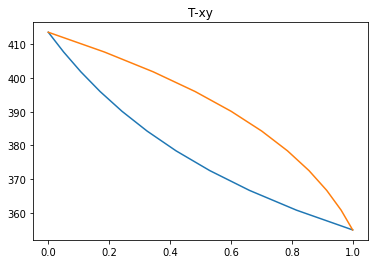

In [ ]:
plt.plot(x1n,temp,y1n,temp)
plt.title("T-xy")